> https://www.kaggle.com/c/tabular-playground-series-may-2021/data

In [1]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = 100

## Data loading

In [3]:
data_path = Path('C:/Users/tharu/datasets/tabular-playground-series-may-2021/')

In [4]:
train_df = pd.read_csv(data_path/'train.csv')
test_df = pd.read_csv(data_path/'test.csv')

train_df.shape, test_df.shape

((100000, 52), (50000, 51))

In [5]:
sample_submission_df = pd.read_csv(data_path/'sample_submission.csv')
sample_submission_df.head()

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.25,0.25,0.25,0.25
1,100001,0.25,0.25,0.25,0.25
2,100002,0.25,0.25,0.25,0.25
3,100003,0.25,0.25,0.25,0.25
4,100004,0.25,0.25,0.25,0.25


In [6]:
target = train_df.target
train_df.drop(['id', 'target'], axis=1, inplace=True)

In [7]:
test_ids = test_df.id
test_df.drop('id', axis=1, inplace=True)

## Feature engineering

In [8]:
print(train_df.columns)
print(f'Total no. of features: {len(train_df.columns)}')

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34',
       'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44',
       'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49'],
      dtype='object')
Total no. of features: 50


### Duplicate rows removal

In [9]:
print(len(train_df))
train_df.drop_duplicates(keep='first', inplace=True)
len(train_df)

100000


99996

In [100]:
target = target[train_df.index]
len(target)

99996

*4 rows are duplicates*

### Imputation

In [10]:
train_df.isnull().sum().sum(), test_df.isnull().sum().sum()

(0, 0)

> *No missing values in the training & testing datasets*

### Identifying Categorical vs Numeric

In [11]:
train_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0
1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0
3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


> *All features are numeric*<br>

Let's find out more from Histogram plot

### Histogram plots of all features

In [40]:
# plotting the histogram graph with y axis set to log scale, as most of values are zeros

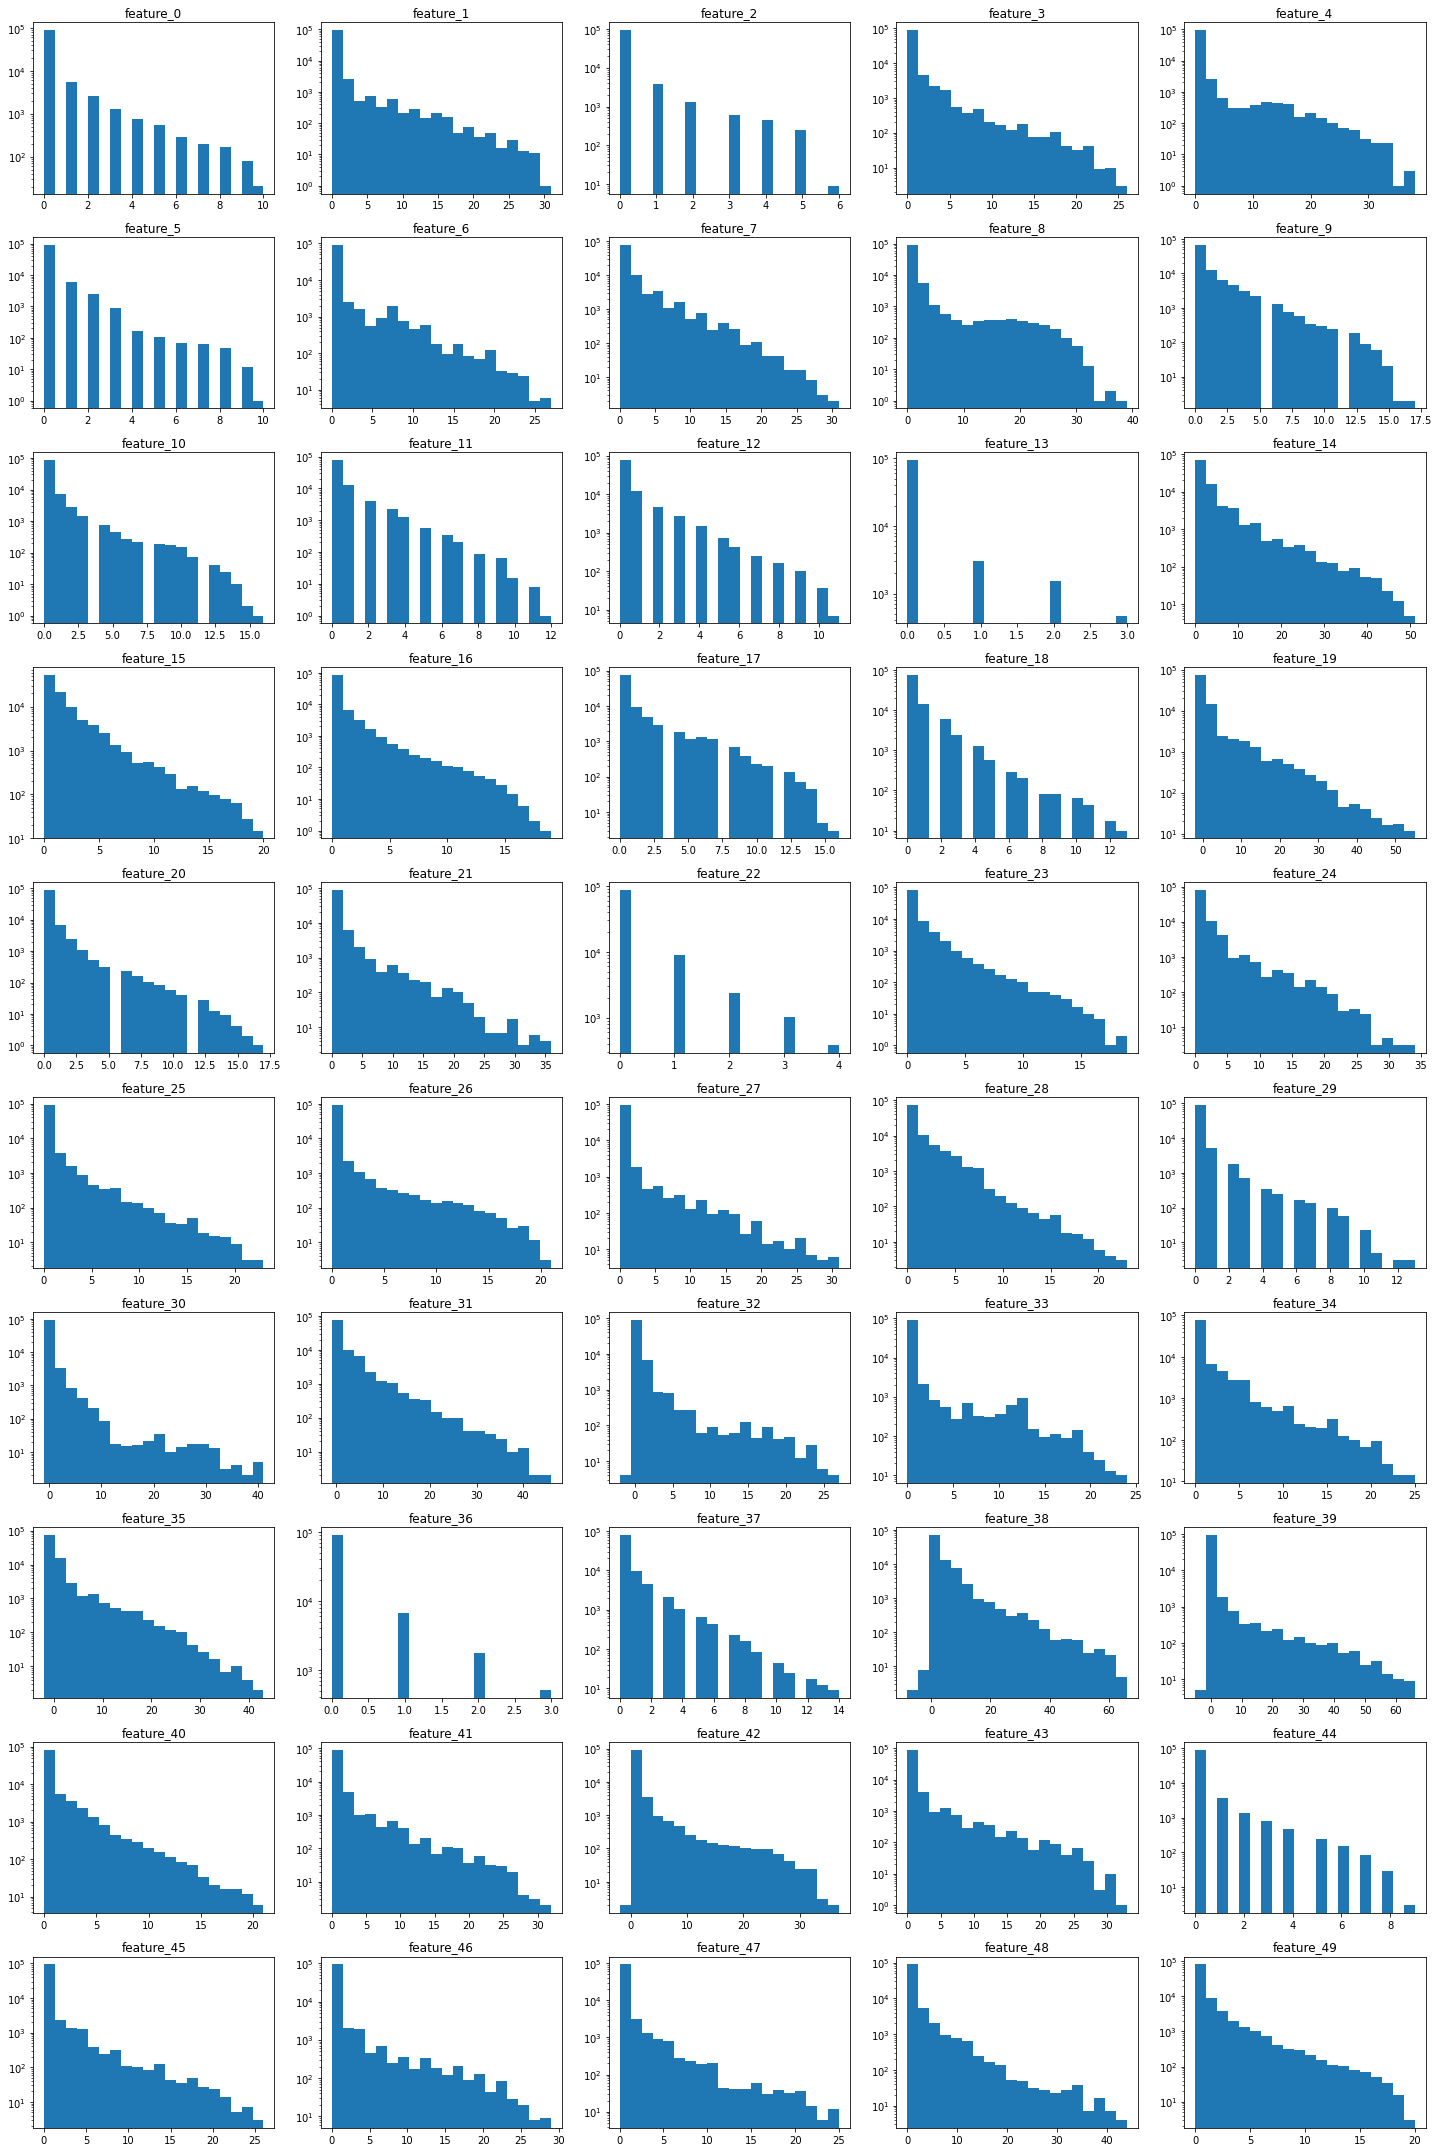

In [44]:
figure, ax = plt.subplots(10, 5, figsize=(20, 30))
ax = [x for y in ax for x in y]
for axis, feature in zip(ax, train_df.columns):
    axis.hist(train_df[feature], bins=20, range=(train_df[feature].min(), train_df[feature].max()))
    axis.set_yscale('log')
    axis.set_title(feature)
figure.tight_layout()
plt.show()

### Insights from histogram plots
1. All the feature data is right skewed
1. Maximum values in any feature column are zeros, >90% in all columns
2. Feature 2, 13, 22, 36 - looks like categorical features
4. Lot of features looks correlated with each other. For example: feature_0 ~= feature_6 & feature_11 ~= feature_12 etc.,

> Should we consider all the features with max value < 10 as **Categorical**?

In [49]:
def get_min_max(x):
    return x.min(), x.max(), len(x.unique())

In [81]:
min_max_df = train_df.apply(lambda x: get_min_max(x), axis=0)
min_max_df.index = ['min', 'max', 'num unique']
min_max_df = min_max_df.transpose()
min_max_df.sort_values('num unique').head(20)

,min,max,num unique
feature_13,0,3,4
feature_36,0,3,4
feature_22,0,4,5
feature_2,0,6,7
feature_44,0,9,10
feature_0,0,10,11
feature_5,0,10,11
feature_12,0,11,12
feature_11,0,12,13
feature_29,0,13,14


1. Not much difference between features with max value >= 10.
2. Considering only 13, 36, 22 and 2 as categorical

In [92]:
cat_features = ['feature_13', 'feature_36', 'feature_22', 'feature_2']

In [93]:
train_df = pd.get_dummies(train_df, columns=cat_features, drop_first=True)
test_df = pd.get_dummies(test_df, columns=cat_features, drop_first=True)

train_df.shape, test_df.shape

((99996, 62), (50000, 62))

## Baseline model building - XGBoost

In [101]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
target_labels = label_encoder.fit_transform(target)
target_labels[:10]

array([1, 0, 0, 3, 1, 1, 0, 1, 1, 3])

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df, target_labels, test_size=0.2, random_state=13, shuffle=True,
                                                    stratify=target_labels)

X_train.shape, X_test.shape

((79996, 62), (20000, 62))

In [111]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(objective='multi:softprob', 
                          use_label_encoder=False, 
                          num_class=4, 
                          colsample_bytree=0.5, 
                          subsample=0.9,
                          eta=0.2,
                          gamma = 0.25,
                          max_depth = 3,
                          reg_lambda = 10,
                          n_estimators = 500)
xgb_model.fit(X_train, y_train,
              verbose=True,
              eval_metric=['mlogloss'],
              eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-mlogloss:1.31098	validation_1-mlogloss:1.31118
[1]	validation_0-mlogloss:1.25799	validation_1-mlogloss:1.25825
[2]	validation_0-mlogloss:1.21986	validation_1-mlogloss:1.22029
[3]	validation_0-mlogloss:1.19168	validation_1-mlogloss:1.19208
[4]	validation_0-mlogloss:1.17079	validation_1-mlogloss:1.17124
[5]	validation_0-mlogloss:1.15511	validation_1-mlogloss:1.15559
[6]	validation_0-mlogloss:1.14339	validation_1-mlogloss:1.14391
[7]	validation_0-mlogloss:1.13451	validation_1-mlogloss:1.13519
[8]	validation_0-mlogloss:1.12784	validation_1-mlogloss:1.12868
[9]	validation_0-mlogloss:1.12272	validation_1-mlogloss:1.12380
[10]	validation_0-mlogloss:1.11874	validation_1-mlogloss:1.11993
[11]	validation_0-mlogloss:1.11562	validation_1-mlogloss:1.11693
[12]	validation_0-mlogloss:1.11315	validation_1-mlogloss:1.11465
[13]	validation_0-mlogloss:1.11110	validation_1-mlogloss:1.11269
[14]	validation_0-mlogloss:1.10940	validation_1-mlogloss:1.11110
[15]	validation_0-mlogloss:1.10802	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.2, gamma=0.25,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.200000003, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_class=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=10, scale_pos_weight=None, subsample=0.9,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [125]:
# test results

predictions = xgb_model.predict_proba(test_df)
predictions_df = pd.DataFrame(predictions, columns=['class_1', 'class_2', 'class_3', 'class_4'])
submission_df = pd.concat([test_ids, predictions_df], axis=1)
submission_df.head()

,id,class_1,class_2,class_3,class_4
0,100000,0.076317,0.622909,0.190677,0.110097
1,100001,0.050011,0.732270,0.124951,0.092768
2,100002,0.079085,0.662530,0.169391,0.088994
3,100003,0.073214,0.592293,0.256006,0.078487
4,100004,0.086037,0.627162,0.179990,0.106811


In [126]:
submission_df.to_csv('xgb_baseline.csv', index=False)